# Name: Sai Sriharsha Griddaluru
## Email: sgridda@clemson.edu
## CUID: C15358926


# HW 1: TASK 1: Simulating a Function

In [1]:
pip install torch torchvision torchaudio

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/ea/ea/4ab009e953bca6ff35ad75b8ab58c0923308636c182c145dc63084f7d136/torch-2.4.1-cp311-cp311-manylinux1_x86_64.whl.metadata
  Using cached torch-2.4.1-cp311-cp311-manylinux1_x86_64.whl.metadata (26 kB)
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/28/9d/40d1b943bbbd02a30d6b4f691d6de37a7e4c92f90bed0f8f47379e90eec6/torchvision-0.19.1-cp311-cp311-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/cc/f3/a950329a25ee1af14c05065ce6c1751f031de9e6d5eebb0620ce3d0938ed/torchaudio-2.4.1-cp311-cp311-manylinux1_x86_64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_ex

In [2]:
# importing pytorch
import torch
import torch.nn as nn  
import torch.nn.functional as F

# importing necessary other libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Function 1 - Non Linear Sine

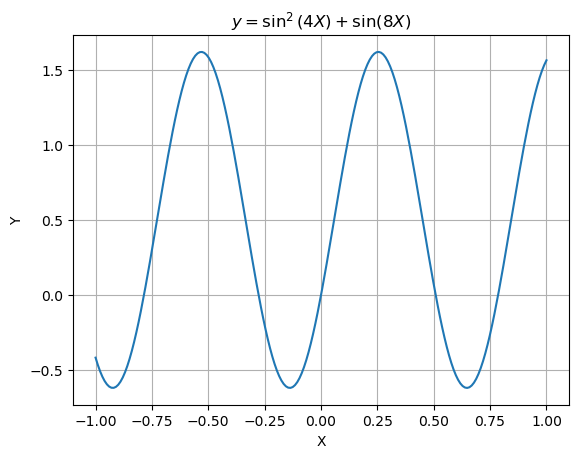

In [3]:
def nonlinear_sine_function(X):
    return np.sin(4*X)**2 + np.sin(8*X)

# Generate X values
X = torch.linspace(-1,1,200).reshape(-1,1)

# Calculate the corresponding Y values
Y = nonlinear_sine_function(X)

# Plot the function
plt.plot(X, Y)
plt.title(r'$y = \sin^2(4X) + \sin(8X)$')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

## Function 1 - Model 0 

In [19]:
class F1Model0(nn.Module):
    def __init__(self, in_features=1, h2=5, h3=10,h4=10,h5=10,h6=10,h7=10,h8=5, out_features=1):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h2)   
        self.fc2 = nn.Linear(h2, h3)
        self.fc3 = nn.Linear(h3, h4)
        self.fc4 = nn.Linear(h4, h5)
        self.fc5 = nn.Linear(h5, h6)
        self.fc6 = nn.Linear(h6, h7)
        self.fc7 = nn.Linear(h7, h8)
        self.out = nn.Linear(h8, out_features)

        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = self.out(x)
        return x

In [20]:
f1_model0 = F1Model0()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(f1_model0.parameters(), lr=0.001)

In [26]:
f1_model0

F1Model0(
  (fc1): Linear(in_features=1, out_features=5, bias=True)
  (fc2): Linear(in_features=5, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=10, bias=True)
  (fc4): Linear(in_features=10, out_features=10, bias=True)
  (fc5): Linear(in_features=10, out_features=10, bias=True)
  (fc6): Linear(in_features=10, out_features=10, bias=True)
  (fc7): Linear(in_features=10, out_features=5, bias=True)
  (out): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
epochs = 2000
f1_model0_losses = []

for i in range(epochs):
    i+=1
    y_pred = f1_model0.forward(X)
    
    loss = criterion(y_pred, Y)

    f1_model0_losses.append(loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [25]:
f1_model0_losses = torch.tensor(f1_model0_losses)

## Function 1 - Model 1

In [28]:
class F1Model1(nn.Module):
    def __init__(self, in_features=1, h2=10, h3=18,h4=15,h5=4, out_features=1):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h2)    # input layer
        self.fc2 = nn.Linear(h2, h3)
        self.fc3 = nn.Linear(h3, h4)
        self.fc4 = nn.Linear(h4, h5)
        self.out = nn.Linear(h5, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.out(x)
        return x

In [31]:
f1_model1 = F1Model1()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(f1_model1.parameters(), lr=0.001)

In [32]:
f1_model1

F1Model1(
  (fc1): Linear(in_features=1, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=18, bias=True)
  (fc3): Linear(in_features=18, out_features=15, bias=True)
  (fc4): Linear(in_features=15, out_features=4, bias=True)
  (out): Linear(in_features=4, out_features=1, bias=True)
)

In [33]:
epochs = 2000
f1_model1_losses = []

for i in range(epochs):
    i+=1
    y_pred_mod1 = f1_model1.forward(X)
    
    loss = criterion(y_pred_mod1, Y)

    f1_model1_losses.append(loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [34]:
f1_model1_losses = torch.tensor(f1_model1_losses)

## Function 1 - Model 2

In [36]:
class F1Model2(nn.Module):
    def __init__(self, in_features=1, h2=190, out_features=1):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h2)  
        self.out = nn.Linear(h2, out_features)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.out(x)
        return x

In [37]:
f1_model2 = F1Model2()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(f1_model2.parameters(), lr=0.001)

In [38]:
f1_model2

F1Model2(
  (fc1): Linear(in_features=1, out_features=190, bias=True)
  (out): Linear(in_features=190, out_features=1, bias=True)
)

In [39]:
epochs = 2000
f1_model2_losses = []

for i in range(epochs):
    i+=1
    y_pred_mod2 = f1_model2.forward(X)
    
    loss = criterion(y_pred_mod2, Y)

    f1_model2_losses.append(loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [40]:
f1_model2_losses = torch.tensor(f1_model2_losses)

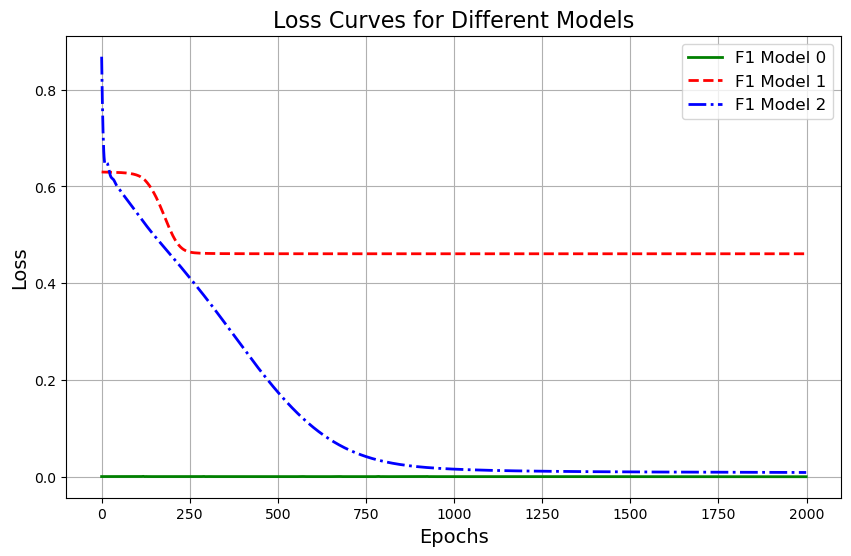

In [43]:
import matplotlib.pyplot as plt
import torch

# Plot the losses for each model
plt.figure(figsize=(10, 6))

# Clone and detach the tensors before converting them to NumPy arrays
plt.plot(range(epochs), f1_model0_losses, color='green', linestyle='-', linewidth=2, label='F1 Model 0')
plt.plot(range(epochs), f1_model1_losses, color='red', linestyle='--', linewidth=2, label='F1 Model 1')
plt.plot(range(epochs), f1_model2_losses, color='blue', linestyle='-.', linewidth=2, label='F1 Model 2')

# Add labels, title, and legend
plt.title('Loss Curves for Different Models', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


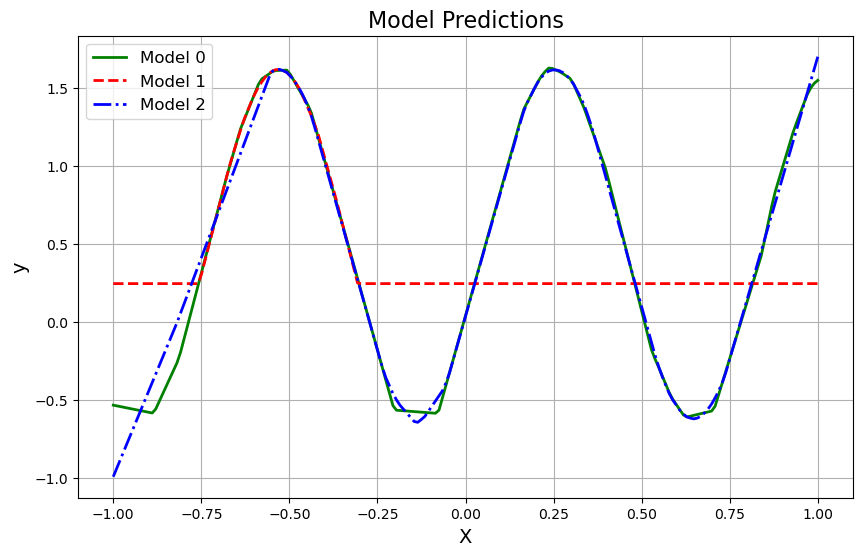

In [44]:
import matplotlib.pyplot as plt
import torch

# Plotting all models
plt.figure(figsize=(10, 6))

# Convert tensors to NumPy arrays for plotting
plt.plot(X.numpy(), y_pred.detach().clone().numpy(), color='green', linestyle='-', linewidth=2, label='Model 0')
plt.plot(X.numpy(), y_pred_mod1.detach().clone().numpy(), color='red', linestyle='--', linewidth=2, label='Model 1')
plt.plot(X.numpy(), y_pred_mod2.detach().clone().numpy(), color='blue', linestyle='-.', linewidth=2, label='Model 2')

# Add labels, title, and legend
plt.title('Model Predictions', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


# Function 2 - Non Linear Sign Function

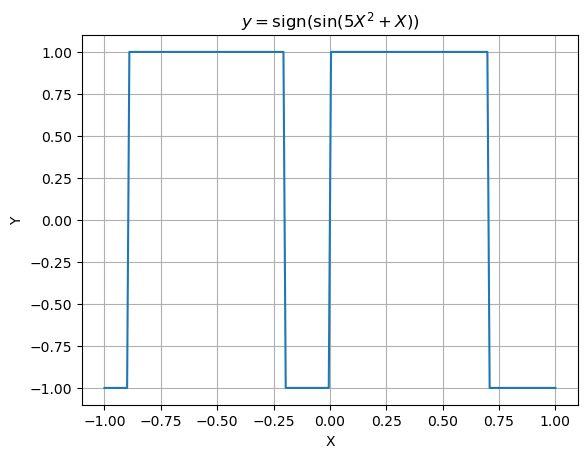

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def nonlinear_sign_function(X):
    return np.sign(np.sin(5*X**2 + X))

# Generate X values
# X = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
X = torch.linspace(-1,1,200).reshape(-1,1)

# Calculate the corresponding Y values
Y = nonlinear_sign_function(X)

# Plot the function
plt.plot(X, Y)
plt.title(r'$y = \mathrm{sign}(\sin(5X^2 + X))$')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


## Function 2 - Model 0

In [54]:
class F2Model0(nn.Module):
    def __init__(self, in_features=1, h2=5, h3=10,h4=10,h5=10,h6=10,h7=10,h8=5, out_features=1):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h2)    # input layer
        self.fc2 = nn.Linear(h2, h3)
        self.fc3 = nn.Linear(h3, h4)
        self.fc4 = nn.Linear(h4, h5)
        self.fc5 = nn.Linear(h5, h6)
        self.fc6 = nn.Linear(h6, h7)
        self.fc7 = nn.Linear(h7, h8)
        self.out = nn.Linear(h8, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = self.out(x)
        return x

In [55]:
f2_model0 = F2Model0()
criterion = nn.MSELoss()

In [56]:
sum = 0
for param in f2_model0.parameters():
    sum = sum+param.numel()
    
print("No of parameters in model =",sum)

No of parameters in model = 571


In [57]:
optimizer = torch.optim.Adam(f2_model0.parameters(), lr=0.001)

In [58]:
epochs = 2000
f2_model0_losses = []

for i in range(epochs):
    i+=1
    y_pred_mod0_f2 = f2_model0.forward(X)
    
    loss = criterion(y_pred_mod0_f2, Y)
    
    f2_model0_losses.append(loss)
     
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [59]:
f2_model0_losses = torch.tensor(f2_model0_losses)

## Function 2 - Model 1

In [60]:
class F2Model1(nn.Module):
    def __init__(self, in_features=1, h2=10, h3=18,h4=15,h5=4, out_features=1):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h2)    # input layer
        self.fc2 = nn.Linear(h2, h3)
        self.fc3 = nn.Linear(h3, h4)
        self.fc4 = nn.Linear(h4, h5)
        self.out = nn.Linear(h5, out_features)  # output layer
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.out(x)
        return x

In [62]:
f2_model1 = F2Model1()
criterion = nn.MSELoss()

In [63]:
sum = 0
for param in f2_model1.parameters():
    sum = sum + param.numel()
    
print("parameters =",sum)

parameters = 572


In [65]:
optimizer = torch.optim.Adam(f2_model1.parameters(), lr=0.001)

In [67]:
epochs = 2000
f2_model1_losses = []

for i in range(epochs):
    i+=1
    y_pred_mod1_f2 = f2_model1.forward(X)
    
    loss = criterion(y_pred_mod1_f2, Y)
    
    f2_model1_losses.append(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [68]:
f2_model1_losses = torch.tensor(f2_model1_losses)

## Function 2 - Model 2

In [69]:
class F2Model2(nn.Module):
    def __init__(self, in_features=1, h2=190, out_features=1):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h2)   
        self.out = nn.Linear(h2, out_features) 
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.out(x)
        return x

In [70]:
f2_model2 = F2Model2()
criterion = nn.MSELoss()

In [71]:
f2_model2

F2Model2(
  (fc1): Linear(in_features=1, out_features=190, bias=True)
  (out): Linear(in_features=190, out_features=1, bias=True)
)

In [72]:
sum = 0
for param in f2_model2.parameters():
    sum = sum + param.numel()
    
print("parameters =",sum)

parameters = 571


In [73]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(f2_model2.parameters(), lr=0.001)

In [76]:
epochs = 2000
f2_model2_losses = []

for i in range(epochs):
    i+=1
    y_pred_mod2_f2 = f2_model2.forward(X)

    loss = criterion(y_pred_mod2_f2, Y)

    f2_model2_losses.append(loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [77]:
f2_model2_losses = torch.tensor(f2_model2_losses)

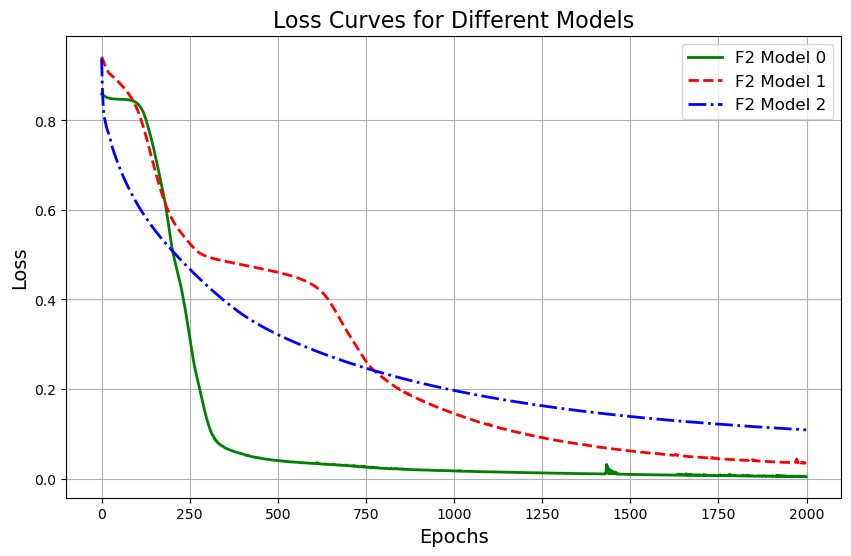

In [78]:
import matplotlib.pyplot as plt
import torch

# Plot the losses for each model
plt.figure(figsize=(10, 6))

# Clone and detach the tensors before converting them to NumPy arrays
plt.plot(range(epochs), f2_model0_losses, color='green', linestyle='-', linewidth=2, label='F2 Model 0')
plt.plot(range(epochs), f2_model1_losses, color='red', linestyle='--', linewidth=2, label='F2 Model 1')
plt.plot(range(epochs), f2_model2_losses, color='blue', linestyle='-.', linewidth=2, label='F2 Model 2')

# Add labels, title, and legend
plt.title('Loss Curves for Different Models', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


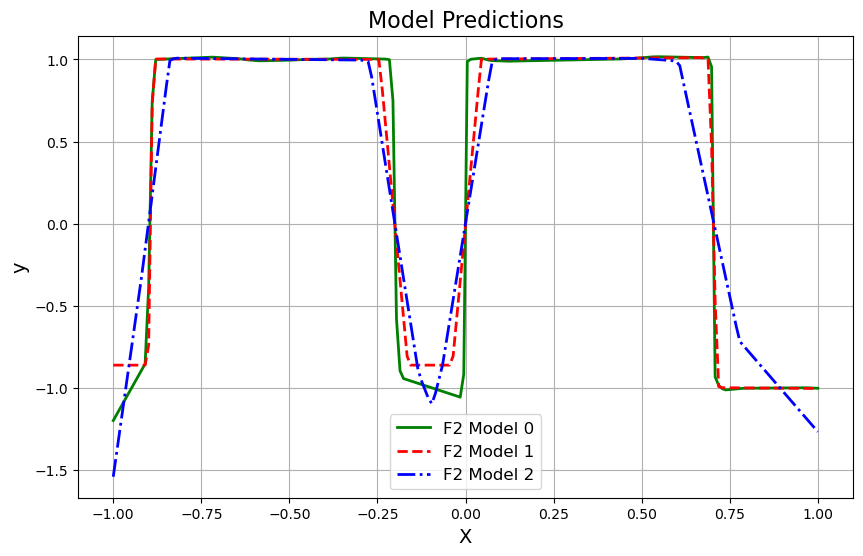

In [79]:
import matplotlib.pyplot as plt
import torch

# Plotting all models
plt.figure(figsize=(10, 6))

# Convert tensors to NumPy arrays for plotting
plt.plot(X.numpy(), y_pred_mod0_f2.detach().clone().numpy(), color='green', linestyle='-', linewidth=2, label='F2 Model 0')
plt.plot(X.numpy(), y_pred_mod1_f2.detach().clone().numpy(), color='red', linestyle='--', linewidth=2, label='F2 Model 1')
plt.plot(X.numpy(), y_pred_mod2_f2.detach().clone().numpy(), color='blue', linestyle='-.', linewidth=2, label='F2 Model 2')

# Add labels, title, and legend
plt.title('Model Predictions', fontsize=16)
plt.xlabel('X', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()
